In [1]:
import pandas as pd
from tableone import TableOne
import matplotlib.pyplot as plt
import numpy as np
import joypy
import seaborn as sns
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Final Cohort

In [3]:
data = pd.read_csv('./data/final_cohort_v3.csv')
data = data.iloc[:, 4:]
data.drop(columns="allergy_cum", inplace=True)
data.drop(columns=['nicotinicacid', 'cotinine', 'hydroxycotinine'], inplace=True)
print(data.shape)
data.head()
# print(gusto.shape) # 1237*44

(1151, 60)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.4,15.40,1.3700,21.60,151.0,106.0,23.2,0.358,29.6,0.1340,0.351,74.6,21.7,62.8,25.1,0.974,57.0,11.20,7.95,1.67,1.300
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,21.1,12.10,0.1770,17.90,146.0,91.0,32.9,0.459,48.8,0.1370,4.230,65.4,17.6,63.2,28.2,1.020,51.8,11.30,9.98,1.84,1.360
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,2.970,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,20.9,12.00,0.3460,49.50,217.0,108.0,38.9,0.531,41.3,0.0953,0.522,82.4,24.3,68.0,18.4,1.020,52.9,13.10,10.40,2.46,0.898
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,NaN,NaN,8.0,NaN,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,17.1,7.18,0.0632,8.58,33.7,NaN,41.1,0.508,47.0,0.1870,7.900,69.7,22.8,62.7,24.6,1.030,51.5,9.15,8.24,1.47,8.820


In [4]:
pd.set_option('display.max_columns', None)
data.loc[data['bf_m6'] == 99, 'bf_m6'] = np.nan
# data.loc[data['ethnicity'] == 4, 'ethnicity'] = np.nan
data.loc[data['bisq_q3_m12'] == -8888, 'bisq_q3_m12'] = np.nan
data.loc[data['bisq_totslphrs_m12'] == -8888, 'bisq_totslphrs_m12'] = np.nan
data.describe()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
count,1151.000000,1151.000000,1141.000000,1047.000000,1135.000000,1137.000000,943.000000,945.000000,1131.000000,1101.000000,1099.000000,1136.000000,1150.000000,1151.000000,1055.00000,1053.000000,833.000000,817.000000,1071.000000,828.000000,1094.000000,1140.000000,1114.000000,1150.000000,1143.000000,1113.000000,1100.000000,785.000000,779.000000,642.000000,641.000000,1094.000000,1120.000000,921.000000,925.000000,872.000000,586.000000,966.000000,489.000000,776.000000,776.000000,776.000000,776.000000,776.000000,747.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,1.529105,31.591086,0.776512,3.921681,0.455507,1.022867,0.039236,0.450794,0.017683,0.375114,0.331210,1.303697,0.511304,38.796299,34.28436,36.565052,34.452581,36.616891,7.272642,6.496377,0.173675,0.425439,0.027828,0.773043,3.109043,0.344115,0.077273,8.551837,11.949380,9.082814,11.883749,0.515539,0.435714,0.038002,0.065946,0.146789,0.564846,0.736025,0.478528,18.163273,22.500322,0.222478,26.446198,94.403879,81.718876,32.593514,0.399702,43.730971,0.156985,2.479360,68.112543,18.426100,72.693299,18.229317,1.030619,46.988144,13.084115,9.177307,1.963863,2.730630
std,0.752257,4.736035,0.416765,1.083325,0.722224,0.969339,0.242834,0.799869,0.131856,0.484372,0.470863,0.460056,0.500090,1.474995,9.83906,8.941763,10.380639,9.825006,4.492610,4.828747,0.379003,0.494626,0.164553,0.908218,0.451020,0.475292,0.267145,1.885748,2.667674,1.449472,1.831601,0.499987,0.496072,0.191305,0.248322,0.354099,0.496201,0.441014,0.500050,4.733147,29.800050,0.255858,29.254260,67.724037,26.824046,8.791257,0.059526,11.719079,0.067789,2.601494,10.066467,4.613805,19.069876,6.447374,0.211118,7.854037,2.559145,1.651000,0.653290,4.665541
min,1.000000,18.930000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.860000,20.00000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.060000,1.940000,0.020200,2.750000,8.560000,20.000000,13.600000,0.275000,13.100000,0.044000,0.078700,42.700000,9.530000,35.500000,5.220000,0.510000,19.700000,6.440000,6.020000,0.870000,0.286000
25%,1.000000,28.305000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.140000,26.00000,30.000000,26.000000,29.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.855000,0.000000,0.000000,7.666667,10.416667,8.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.100000,9.352500,0.088475,10.500000,33.875000,63.000000,26.275000,0.358750,35.500000,0.111000,0.635500,61.200000,14.400000,60.300000,13.700000,0.867750,41.300000,11.300000,7.917500,1.547500,0.916250
50%,1.000000,31.520000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,39.000000,33.00000,36.000000,33.000000,36.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.120000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0000

In [5]:
data.drop(columns=["eczema_label", 'rhinitis_label', 'wheeze_label'], inplace=True)

In [6]:
pd.set_option('display.max_rows', None)
columns = list(data.columns)
categorical = ['ethnicity', 'highest_edu12', 'household_income', 'pc_vig', 'pc_mvpa', 'pg_vig', 
'pg_mvpa', 'smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'delivery_mode', 'sex', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 
'antibiotics_labour', 'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
mytable = TableOne(data, columns=columns, categorical=categorical, dip_test=True, normal_test=True, tukey_test=True)
mytable
# print(mytable.tabulate(tablefmt="github"))

Missing      Overall
n                                                   1151
ethnicity, n (%)                1.0       0   716 (62.2)
                                2.0           269 (23.4)
                                3.0           158 (13.7)
                                4.0              8 (0.7)
delivery_age, mean (SD)                   0   31.6 (4.7)
highest_edu12, n (%)            0.0      10   255 (22.3)
                                1.0           886 (77.7)
household_income, n (%)         1.0     104     16 (1.5)
                                2.0            100 (9.6)
                                3.0           262 (25.0)
                                4.0           241 (23.0)
                                5.0           428 (40.9)
pc_vig, n (%)                   0.0      16   773 (68.1)
                                1.0           207 (18.2)
                                2.0           155 (13.7)
pc_mvpa, n (%)                  0.0      14   388 (34.1)
                                1.0           468 (41.2)
                                2.0           148 (13.0)
                                3.0           133 (11.7)
pg_vig, n (%)                   0.0     208   916 (97.1)
                                1.0             17 (1.8)
                                2.0             10 (1.1)
pg_mvpa, n (%)                  0.0     206   654 (69.2)
                                1.0           206 (21.8)
                                2.0             35 (3.7)
                                3.0             50 (5.3)
smoking_pg, n (%)               0.0      20  1111 (98.2)
                                1.0             20 (1.8)
passive_smoke_pc, n (%)         0.0      50   688 (62.5)
                                1.0           413 (37.5)
passive_smoke_pg, n (%)         0.0      52   735 (66.9)
                                1.0           364 (33.1)
delivery_mode, n (%)            1.0      15   791 (69.6)
                                2.0           345 (30.4)
sex, n (%)                      0.0       1   562 (48.9)
                                1.0           588 (51.1)
ga, mean (SD)                             0   38.8 (1.5)
stai_state_pw26, mean (SD)               96   34.3 (9.8)
stai_trait_pw26, mean (SD)               98   36.6 (8.9)
stai_state_m3, mean (SD)                318  34.5 (10.4)
stai_trait_m3, mean (SD)                334   36.6 (9.8)
epds_tot_pw26, mean (SD)                 80    7.3 (4.5)
epds_tot_m3, mean (SD)                  323    6.5 (4.8)
infection_m3, n (%)             0.0      57   904 (82.6)
                                1.0           190 (17.4)
alcohol_pc, n (%)               0.0      11   655 (57.5)
                                1.0           485 (42.5)
alcohol_pg, n (%)               0.0      37  1083 (97.2)
                                1.0             31 (2.8)
parity, mean (SD)                         1    0.8 (0.9)
weight_birth, mean (SD)                   8    3.1 (0.5)
antibiotics_labour, n (%)       0.0      38   730 (65.6)
                                1.0           383 (34.4)
antibiotics_m3, n (%)           0.0      51  1015 (92.3)
                                1.0             85 (7.7)
bisq_q3_m6, mean (SD)                   366    8.6 (1.9)
bisq_totslphrs_m6, mean (SD)            372   11.9 (2.7)
bisq_q3_m12, mean (SD)                  509    9.1 (1.4)
bisq_totslphrs_m12, mean (SD)           510   11.9 (1.8)
bf_m6, n (%)                    0.0      57   530 (48.4)
                                1.0           564 (51.6)
maternal_allergy_pw11, n (%)    0.0      31   632 (56.4)
                                1.0           488 (43.6)
cat, n (%)                      0.0     230   886 (96.2)
                                1.0             35 (3.8)
dog, n (%)                      0.0     226   864 (93.4)
                                1.0             61 (6.6)
expressway, n (%)               0.0     279   744 (85.3)
                                1.0           

In [7]:
len('neopterin, riboflavin, trigonelline, pyridoxal, arginine, cystathionine, m3histidine, histidine, hydroxyanthralinicac, kynurenicacid, dimethylglycine, trimethylaminenoxide, cotinine, hydroxycotinine'.split(', '))

14

In [8]:
ls_bevital = 'neopterin, riboflavin, nicotinicacid, trigonelline, pyridoxal, pyridoxalphosphate, arginine, adma, creatine, cystathionine, m3histidine, histidine, methionine, hydroxyanthralinicac, kynurenicacid, kynurenine, betaine, choline, dimethylglycine, trimethylaminenoxide, cotinine, hydroxycotinine'.split(', ')
len(ls_bevital)

22

In [9]:
pd.set_option('display.max_rows', None)
nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12" 
nonnormal = nonnormal.split(", ") + ls_bevital
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
mytable = TableOne(data, columns=columns, categorical=categorical, nonnormal=nonnormal, limit=limit)
mytable

Missing            Overall
n                                                              1151
ethnicity, n (%)                     1.0       0         716 (62.2)
                                     2.0                 269 (23.4)
                                     3.0                 158 (13.7)
                                     4.0                    8 (0.7)
delivery_age, mean (SD)                        0         31.6 (4.7)
highest_edu12, n (%)                 0.0      10         255 (22.3)
                                     1.0                 886 (77.7)
household_income, n (%)              1.0     104           16 (1.5)
                                     2.0                  100 (9.6)
                                     3.0                 262 (25.0)
                                     4.0                 241 (23.0)
                                     5.0                 428 (40.9)
pc_vig, n (%)                        0.0      16         773 (68.1)
                                     1.0                 207 (18.2)
                                     2.0                 155 (13.7)
pc_mvpa, n (%)                       0.0      14         388 (34.1)
                                     1.0                 468 (41.2)
                                     2.0                 148 (13.0)
                                     3.0                 133 (11.7)
pg_vig, n (%)                        0.0     208         916 (97.1)
                                     1.0                   17 (1.8)
                                     2.0                   10 (1.1)
pg_mvpa, n (%)                       0.0     206         654 (69.2)
                                     1.0                 206 (21.8)
                                     2.0                   35 (3.7)
                                     3.0                   50 (5.3)
smoking_pg, n (%)                    0.0      20        1111 (98.2)
                                     1.0                   20 (1.8)
passive_smoke_pc, n (%)              0.0      50         688 (62.5)
                                     1.0                 413 (37.5)
passive_smoke_pg, n (%)              0.0      52         735 (66.9)
                                     1.0                 364 (33.1)
delivery_mode, n (%)                 1.0      15         791 (69.6)
                                     2.0                 345 (30.4)
sex, n (%)                           0.0       1         562 (48.9)
                                     1.0                 588 (51.1)
ga, median [Q1,Q3]                             0   39.0 [38.1,39.7]
stai_state_pw26, median [Q1,Q3]               96   33.0 [26.0,41.0]
stai_trait_pw26, median [Q1,Q3]               98   36.0 [30.0,43.0]
stai_state_m3, median [Q1,Q3]                318   33.0 [26.0,41.0]
stai_trait_m3, median [Q1,Q3]                334   36.0 [29.0,43.0]
epds_tot_pw26, median [Q1,Q3]                 80     7.0 [4.0,10.0]
epds_tot_m3, median [Q1,Q3]                  323      6.0 [3.0,9.0]
infection_m3, n (%)                  0.0      57         904 (82.6)
                                     1.0                 190 (17.4)
alcohol_pc, n (%)                    0.0      11         655 (57.5)
                                     1.0                 485 (42.5)
alcohol_pg, n (%)                    0.0      37        1083 (97.2)
                                     1.0                   31 (2.8)
parity, median [Q1,Q3]                         1      1.0 [0.0,1.0]
weight_birth, median [Q1,Q3]                   8      3.1 [2.9,3.4]
antibiotics_labour, n (%)            0.0      38         730 (65.6)
                                     1.0                 383 (34.4)
antibiotics_m3, n (%)                0.0      51        1015 (92.3)
                                     1.0                   85 (7.7)
bisq_q3_m6, median [Q1,Q3]                   366     9.0 [7.7,10.0]
bisq_totslphrs_m6, median [Q1,Q3]            372   12.0 [10.4,14.0]
bisq_q3_m12, median [Q1,Q3]  

In [10]:
# Save to Excel
fn1 = './tableone/paper/final_cohort_v3.xlsx'
mytable.to_excel(fn1)

## Excluded Patients

In [11]:
excluded = pd.read_csv('./data/excluded_v3.csv')
excluded = excluded.iloc[:, 4:]
excluded.drop(columns="allergy_cum", inplace=True)
excluded.drop(columns=['nicotinicacid', 'cotinine', 'hydroxycotinine'], inplace=True)
excluded.head()
# print(gusto.shape) # 1237*44

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
0,3.0,30.89,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,39.86,26.0,28.0,22.0,29.0,4.0,2.0,0.0,0.0,0.0,0.0,3.365,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,13.5,23.10,0.147,8.12,38.5,57.0,38.7,0.360,33.3,0.1340,6.190,73.5,21.9,70.4,20.7,1.10,62.9,15.8,7.79,2.04,1.38
1,1.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,29.27,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,38.14,21.0,24.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,2.976,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,31.40,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,38.00,23.0,29.0,48.0,51.0,6.0,9.0,0.0,1.0,0.0,0.0,2.885,1.0,0.0,9.5,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,14.9,9.97,0.558,35.20,107.0,85.0,30.3,0.374,45.7,0.0825,0.335,68.1,13.7,49.3,16.2,0.94,42.8,18.0,9.43,2.81,8.56


In [12]:
excluded.describe()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
count,462.000000,385.000000,455.000000,416.000000,408.000000,408.000000,309.000000,309.000000,386.000000,399.000000,379.000000,375.000000,384.000000,385.000000,358.000000,356.000000,174.000000,171.000000,369.000000,172.000000,232.000000,407.000000,383.000000,397.000000,376.000000,367.000000,236.000000,134.000000,133.000000,92.000000,92.000000,429.000000,454.000000,197.000000,198.000000,172.000000,0.0,0.0,0.0,202.000000,202.000000,202.000000,202.000000,202.000000,195.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,1.647186,30.240623,0.694505,3.685096,0.431373,0.980392,0.022654,0.278317,0.028497,0.408521,0.374670,1.256000,0.513021,38.590416,35.170391,36.814607,33.551724,35.713450,7.162602,6.133721,0.094828,0.466830,0.010444,0.614610,3.024955,0.395095,0.042373,8.557214,11.985902,9.074275,11.774004,46.396270,0.396476,0.015228,0.080808,0.127907,NaN,NaN,NaN,17.650000,20.588861,0.260094,27.059604,97.183366,78.379487,31.401980,0.400099,41.761881,0.150205,2.358005,67.268317,17.773465,71.177723,17.748119,1.030193,45.988119,13.378366,9.061485,2.011782,2.092837
std,0.808699,4.506760,0.461124,1.161374,0.715017,1.010805,0.204188,0.679153,0.166605,0.492178,0.484677,0.437005,0.500483,1.635515,9.861876,8.970651,11.040397,10.156122,4.484952,4.630135,0.293610,0.499513,0.101793,0.861692,0.464529,0.489539,0.201867,1.922241,2.812680,1.356678,1.784430,49.218961,0.489705,0.122772,0.273231,0.334961,NaN,NaN,NaN,3.784365,17.773657,0.288528,25.512639,72.597133,28.349432,8.735488,0.058717,11.630979,0.066624,2.661741,10.722264,4.681582,17.536726,6.350339,0.200778,8.638463,3.061267,1.598009,0.870831,2.641163
min,1.000000,19.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.570000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.160000,0.000000,0.000000,2.000000,4.000000,5.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,10.200000,1.750000,0.022900,3.310000,9.170000,21.000000,13.600000,0.253000,14.400000,0.060100,0.120000,41.100000,9.840000,29.500000,5.610000,0.582000,23.900000,5.260000,5.380000,1.020000,0.218000
25%,1.000000,27.070000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,26.250000,30.000000,24.000000,28.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.766000,0.000000,0.000000,7.541667,10.500000,8.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,15.100000,8.870000,0.089450,11.250000,38.125000,56.500000,25.100000,0.355750,34.675000,0.102000,0.526500,59.725000,14.025000,58.625000,13.150000,0.887250,39.625000,11.200000,7.945000,1.532500,0.869000
50%,1.000000,30.320000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,38.860000,34.000000,37.000000,31.000000,34.000000,7.000000,5.500000,0.000000,0.000000,0.000000,0.000000,3.060000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,17.000000,15.650000,0.149500,20.750000,82.450000,79.000000,30.450000,0.402000,41.000000,0.129500,1.4

In [13]:
pd.set_option('display.max_columns', None)
excluded.loc[excluded['bf_m6'] == 99, 'bf_m6'] = np.nan
# data.loc[data['ethnicity'] == 4, 'ethnicity'] = np.nan
excluded.loc[excluded['bisq_q3_m12'] == -8888, 'bisq_q3_m12'] = np.nan
excluded.loc[excluded['bisq_totslphrs_m12'] == -8888, 'bisq_totslphrs_m12'] = np.nan
excluded.describe()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
count,462.000000,385.000000,455.000000,416.000000,408.000000,408.000000,309.000000,309.000000,386.000000,399.000000,379.000000,375.000000,384.000000,385.000000,358.000000,356.000000,174.000000,171.000000,369.000000,172.000000,232.000000,407.000000,383.000000,397.000000,376.000000,367.000000,236.000000,134.000000,133.000000,92.000000,92.000000,229.000000,454.000000,197.000000,198.000000,172.000000,0.0,0.0,0.0,202.000000,202.000000,202.000000,202.000000,202.000000,195.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,1.647186,30.240623,0.694505,3.685096,0.431373,0.980392,0.022654,0.278317,0.028497,0.408521,0.374670,1.256000,0.513021,38.590416,35.170391,36.814607,33.551724,35.713450,7.162602,6.133721,0.094828,0.466830,0.010444,0.614610,3.024955,0.395095,0.042373,8.557214,11.985902,9.074275,11.774004,0.454148,0.396476,0.015228,0.080808,0.127907,NaN,NaN,NaN,17.650000,20.588861,0.260094,27.059604,97.183366,78.379487,31.401980,0.400099,41.761881,0.150205,2.358005,67.268317,17.773465,71.177723,17.748119,1.030193,45.988119,13.378366,9.061485,2.011782,2.092837
std,0.808699,4.506760,0.461124,1.161374,0.715017,1.010805,0.204188,0.679153,0.166605,0.492178,0.484677,0.437005,0.500483,1.635515,9.861876,8.970651,11.040397,10.156122,4.484952,4.630135,0.293610,0.499513,0.101793,0.861692,0.464529,0.489539,0.201867,1.922241,2.812680,1.356678,1.784430,0.498984,0.489705,0.122772,0.273231,0.334961,NaN,NaN,NaN,3.784365,17.773657,0.288528,25.512639,72.597133,28.349432,8.735488,0.058717,11.630979,0.066624,2.661741,10.722264,4.681582,17.536726,6.350339,0.200778,8.638463,3.061267,1.598009,0.870831,2.641163
min,1.000000,19.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.570000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.160000,0.000000,0.000000,2.000000,4.000000,5.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,10.200000,1.750000,0.022900,3.310000,9.170000,21.000000,13.600000,0.253000,14.400000,0.060100,0.120000,41.100000,9.840000,29.500000,5.610000,0.582000,23.900000,5.260000,5.380000,1.020000,0.218000
25%,1.000000,27.070000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,26.250000,30.000000,24.000000,28.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.766000,0.000000,0.000000,7.541667,10.500000,8.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,15.100000,8.870000,0.089450,11.250000,38.125000,56.500000,25.100000,0.355750,34.675000,0.102000,0.526500,59.725000,14.025000,58.625000,13.150000,0.887250,39.625000,11.200000,7.945000,1.532500,0.869000
50%,1.000000,30.320000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,38.860000,34.000000,37.000000,31.000000,34.000000,7.000000,5.500000,0.000000,0.000000,0.000000,0.000000,3.060000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,17.000000,15.650000,0.149500,20.750000,82.450000,79.000000,30.450000,0.402000,41.000000,0.129500,1.475

In [14]:
excluded.drop(columns=["eczema_label", 'rhinitis_label', 'wheeze_label'], inplace=True)

In [15]:
pd.set_option('display.max_rows', None)
columns = list(excluded.columns)
categorical = ['ethnicity', 'highest_edu12', 'household_income', 'pc_vig', 'pc_mvpa', 'pg_vig', 
'pg_mvpa', 'smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'delivery_mode', 'sex', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 
'antibiotics_labour', 'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
mytable2 = TableOne(excluded, columns=columns, categorical=categorical, dip_test=True, normal_test=True, tukey_test=True)
mytable2
# print(mytable.tabulate(tablefmt="github"))

Missing      Overall
n                                                    465
ethnicity, n (%)                1.0       3   260 (56.3)
                                2.0           106 (22.9)
                                3.0            95 (20.6)
                                4.0              1 (0.2)
delivery_age, mean (SD)                  80   30.2 (4.5)
highest_edu12, n (%)            0.0      10   139 (30.5)
                                1.0           316 (69.5)
household_income, n (%)         1.0      49     13 (3.1)
                                2.0            57 (13.7)
                                3.0           117 (28.1)
                                4.0            90 (21.6)
                                5.0           139 (33.4)
pc_vig, n (%)                   0.0      57   286 (70.1)
                                1.0            68 (16.7)
                                2.0            54 (13.2)
pc_mvpa, n (%)                  0.0      57   163 (40.0)
                                1.0           139 (34.1)
                                2.0            57 (14.0)
                                3.0            49 (12.0)
pg_vig, n (%)                   0.0     156   305 (98.7)
                                1.0              1 (0.3)
                                2.0              3 (1.0)
pg_mvpa, n (%)                  0.0     156   253 (81.9)
                                1.0            36 (11.7)
                                2.0             10 (3.2)
                                3.0             10 (3.2)
smoking_pg, n (%)               0.0      79   375 (97.2)
                                1.0             11 (2.8)
passive_smoke_pc, n (%)         0.0      66   236 (59.1)
                                1.0           163 (40.9)
passive_smoke_pg, n (%)         0.0      86   237 (62.5)
                                1.0           142 (37.5)
delivery_mode, n (%)            1.0      90   279 (74.4)
                                2.0            96 (25.6)
sex, n (%)                      0.0      81   187 (48.7)
                                1.0           197 (51.3)
ga, mean (SD)                            80   38.6 (1.6)
stai_state_pw26, mean (SD)              107   35.2 (9.9)
stai_trait_pw26, mean (SD)              109   36.8 (9.0)
stai_state_m3, mean (SD)                291  33.6 (11.0)
stai_trait_m3, mean (SD)                294  35.7 (10.2)
epds_tot_pw26, mean (SD)                 96    7.2 (4.5)
epds_tot_m3, mean (SD)                  293    6.1 (4.6)
infection_m3, n (%)             0.0     233   210 (90.5)
                                1.0             22 (9.5)
alcohol_pc, n (%)               0.0      58   217 (53.3)
                                1.0           190 (46.7)
alcohol_pg, n (%)               0.0      82   379 (99.0)
                                1.0              4 (1.0)
parity, mean (SD)                        68    0.6 (0.9)
weight_birth, mean (SD)                  89    3.0 (0.5)
antibiotics_labour, n (%)       0.0      98   222 (60.5)
                                1.0           145 (39.5)
antibiotics_m3, n (%)           0.0     229   226 (95.8)
                                1.0             10 (4.2)
bisq_q3_m6, mean (SD)                   331    8.6 (1.9)
bisq_totslphrs_m6, mean (SD)            332   12.0 (2.8)
bisq_q3_m12, mean (SD)                  373    9.1 (1.4)
bisq_totslphrs_m12, mean (SD)           373   11.8 (1.8)
bf_m6, n (%)                    0.0     236   125 (54.6)
                                1.0           104 (45.4)
maternal_allergy_pw11, n (%)    0.0      11   274 (60.4)
                                1.0           180 (39.6)
cat, n (%)                      0.0     268   194 (98.5)
                                1.0              3 (1.5)
dog, n (%)                      0.0     267   182 (91.9)
                                1.0             16 (8.1)
expressway, n (%)               0.0     293   150 (87.2)
                                1.0           

In [16]:
ls_bevital = 'neopterin, riboflavin, trigonelline, pyridoxal, pyridoxalphosphate, arginine, creatine, cystathionine, m3histidine, hydroxyanthralinicac, kynurenicacid, tryptophan, betaine, dimethylglycine, trimethylaminenoxide'.split(', ')
len(ls_bevital)

15

In [17]:
pd.set_option('display.max_rows', None)
nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12"
nonnormal = nonnormal.split(", ") + ls_bevital
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
mytable2 = TableOne(excluded, columns=columns, categorical=categorical, nonnormal=nonnormal, limit=limit)
mytable2

Missing            Overall
n                                                               465
ethnicity, n (%)                     1.0       3         260 (56.3)
                                     2.0                 106 (22.9)
                                     3.0                  95 (20.6)
                                     4.0                    1 (0.2)
delivery_age, mean (SD)                       80         30.2 (4.5)
highest_edu12, n (%)                 0.0      10         139 (30.5)
                                     1.0                 316 (69.5)
household_income, n (%)              1.0      49           13 (3.1)
                                     2.0                  57 (13.7)
                                     3.0                 117 (28.1)
                                     4.0                  90 (21.6)
                                     5.0                 139 (33.4)
pc_vig, n (%)                        0.0      57         286 (70.1)
                                     1.0                  68 (16.7)
                                     2.0                  54 (13.2)
pc_mvpa, n (%)                       0.0      57         163 (40.0)
                                     1.0                 139 (34.1)
                                     2.0                  57 (14.0)
                                     3.0                  49 (12.0)
pg_vig, n (%)                        0.0     156         305 (98.7)
                                     1.0                    1 (0.3)
                                     2.0                    3 (1.0)
pg_mvpa, n (%)                       0.0     156         253 (81.9)
                                     1.0                  36 (11.7)
                                     2.0                   10 (3.2)
                                     3.0                   10 (3.2)
smoking_pg, n (%)                    0.0      79         375 (97.2)
                                     1.0                   11 (2.8)
passive_smoke_pc, n (%)              0.0      66         236 (59.1)
                                     1.0                 163 (40.9)
passive_smoke_pg, n (%)              0.0      86         237 (62.5)
                                     1.0                 142 (37.5)
delivery_mode, n (%)                 1.0      90         279 (74.4)
                                     2.0                  96 (25.6)
sex, n (%)                           0.0      81         187 (48.7)
                                     1.0                 197 (51.3)
ga, median [Q1,Q3]                            80   38.9 [38.0,39.6]
stai_state_pw26, median [Q1,Q3]              107   34.0 [26.2,43.0]
stai_trait_pw26, median [Q1,Q3]              109   37.0 [30.0,43.0]
stai_state_m3, median [Q1,Q3]                291   31.0 [24.0,40.0]
stai_trait_m3, median [Q1,Q3]                294   34.0 [28.0,42.5]
epds_tot_pw26, median [Q1,Q3]                 96     7.0 [4.0,10.0]
epds_tot_m3, median [Q1,Q3]                  293     5.5 [2.0,10.0]
infection_m3, n (%)                  0.0     233         210 (90.5)
                                     1.0                   22 (9.5)
alcohol_pc, n (%)                    0.0      58         217 (53.3)
                                     1.0                 190 (46.7)
alcohol_pg, n (%)                    0.0      82         379 (99.0)
                                     1.0                    4 (1.0)
parity, median [Q1,Q3]                        68      0.0 [0.0,1.0]
weight_birth, median [Q1,Q3]                  89      3.1 [2.8,3.3]
antibiotics_labour, n (%)            0.0      98         222 (60.5)
                                     1.0                 145 (39.5)
antibiotics_m3, n (%)                0.0     229         226 (95.8)
                                     1.0                   10 (4.2)
bisq_q3_m6, median [Q1,Q3]                   331     9.0 [7.5,10.0]
bisq_totslphrs_m6, median [Q1,Q3]            332   12.0 [10.5,14.0]
bisq_q3_m12, median [Q1,Q3]  

In [18]:
# Save to Excel
fn2 = './tableone/paper/excluded_patients_v3.xlsx'
mytable2.to_excel(fn2)

## Compare final cohort & excluded patients

In [19]:
data["exclude_flag"] = 0
excluded["exclude_flag"] = 1
excluded.head()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide,exclude_flag
0,3.0,30.89,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,39.86,26.0,28.0,22.0,29.0,4.0,2.0,0.0,0.0,0.0,0.0,3.365,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,13.5,23.10,0.147,8.12,38.5,57.0,38.7,0.360,33.3,0.1340,6.190,73.5,21.9,70.4,20.7,1.10,62.9,15.8,7.79,2.04,1.38,1
1,1.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.0,29.27,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,38.14,21.0,24.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,2.976,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.0,31.40,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,38.00,23.0,29.0,48.0,51.0,6.0,9.0,0.0,1.0,0.0,0.0,2.885,1.0,0.0,9.5,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,14.9,9.97,0.558,35.20,107.0,85.0,30.3,0.374,45.7,0.0825,0.335,68.1,13.7,49.3,16.2,0.94,42.8,18.0,9.43,2.81,8.56,1


In [20]:
combined = pd.concat([data, excluded])
combined.loc[combined['ethnicity'] == 4.0, 'ethnicity'] = np.nan
# combined.loc[combined['pg_vig'] > 0.0, 'pg_vig'] = np.nan
combined.reset_index(drop=True, inplace=True)
print(combined.shape)
combined.head()

(1616, 58)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide,exclude_flag
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,15.4,15.40,1.3700,21.60,151.0,106.0,23.2,0.358,29.6,0.1340,0.351,74.6,21.7,62.8,25.1,0.974,57.0,11.20,7.95,1.67,1.300,0
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,21.1,12.10,0.1770,17.90,146.0,91.0,32.9,0.459,48.8,0.1370,4.230,65.4,17.6,63.2,28.2,1.020,51.8,11.30,9.98,1.84,1.360,0
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,2.970,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,20.9,12.00,0.3460,49.50,217.0,108.0,38.9,0.531,41.3,0.0953,0.522,82.4,24.3,68.0,18.4,1.020,52.9,13.10,10.40,2.46,0.898,0
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,NaN,NaN,8.0,NaN,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,17.1,7.18,0.0632,8.58,33.7,NaN,41.1,0.508,47.0,0.1870,7.900,69.7,22.8,62.7,24.6,1.030,51.5,9.15,8.24,1.47,8.820,0


In [21]:
combined.loc[combined['ethnicity'] == 4.0, 'ethnicity']
combined.loc[combined['pg_vig'] > 0.0, 'pg_vig']

16      2.0
74      1.0
104     1.0
122     1.0
131     2.0
136     1.0
201     2.0
288     2.0
374     2.0
448     1.0
472     1.0
478     1.0
505     2.0
511     1.0
565     1.0
571     2.0
603     2.0
657     1.0
695     1.0
713     1.0
750     1.0
799     1.0
902     1.0
940     2.0
1027    1.0
1034    1.0
1127    2.0
1183    2.0
1193    2.0
1480    1.0
1562    2.0
Name: pg_vig, dtype: float64

In [22]:
combined.describe()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide,exclude_flag
count,1604.000000,1536.000000,1596.000000,1463.000000,1543.000000,1545.000000,1252.000000,1254.000000,1517.000000,1500.00000,1478.000000,1511.000000,1534.000000,1536.000000,1413.000000,1409.000000,1007.000000,988.000000,1440.000000,1000.000000,1326.000000,1547.000000,1497.000000,1547.000000,1519.000000,1480.000000,1336.000000,919.000000,912.000000,734.000000,733.000000,1323.000000,1574.000000,1118.000000,1123.000000,1044.000000,978.000000,978.000000,978.000000,978.000000,978.000000,942.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,1616.000000
mean,1.549252,31.252591,0.753133,3.854409,0.449125,1.011650,0.035144,0.408293,0.020435,0.38400,0.342355,1.291860,0.511734,38.744694,34.508846,36.628105,34.296922,36.460526,7.244444,6.434000,0.159879,0.436328,0.023380,0.732385,3.088228,0.356757,0.071108,8.552621,11.954706,9.081744,11.869975,0.504913,0.424396,0.033989,0.068566,0.143678,18.057260,22.105521,0.230248,26.572894,94.977965,81.027601,32.347410,0.399784,43.324267,0.155584,2.454295,67.938173,18.291302,72.380266,18.129928,1.030531,46.781595,13.144891,9.153384,1.973761,2.598898,0.287748
std,0.750591,4.714664,0.431324,1.110819,0.720173,0.980308,0.233921,0.775191,0.141530,0.48652,0.474658,0.454769,0.500025,1.518903,9.848899,8.946540,10.497478,9.883796,4.489348,4.794855,0.366632,0.496090,0.151158,0.898902,0.455696,0.479204,0.257101,1.890055,2.687747,1.437284,1.824910,0.500165,0.494408,0.181283,0.252828,0.350931,4.556357,27.749342,0.263225,28.510341,68.729886,27.165203,8.788567,0.059330,11.722163,0.067572,2.613139,10.205476,4.633023,18.764818,6.427176,0.208924,8.027976,2.671578,1.640058,0.703519,4.332278,0.452853
min,1.000000,18.930000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,25.860000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.060000,1.750000,0.020200,2.750000,8.560000,20.000000,13.600000,0.253000,13.100000,0.044000,0.078700,41.100000,9.530000,29.500000,5.220000,0.510000,19.700000,5.260000,5.380000,0.870000,0.218000,0.000000
25%,1.000000,28.110000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,38.140000,26.000000,30.000000,26.000000,29.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.834000,0.000000,0.000000,7.625000,10.458333,8.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.100000,9.175000,0.088450,10.600000,34.275000,61.250000,25.925000,0.358000,35.300000,0.109000,0.622250,61.000000,14.200000,59.725000,13.700000,0.872000,40.925000,11.300000,7.920000,1.540000,0.902250,0.000000
50%,1.000000,31.225000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,39.000000,34.000000,36.000000,33.000000,35.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.105000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.200000,14.900000,0.142000,19.700000,79.100000,81.000000,31.450000,0.395000,42.800000,0.140000,1.565000,67.100000,18.350000,69.

In [23]:
pd.set_option('display.max_rows', None)
nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12"
nonnormal = nonnormal.split(", ")
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
groupby = ['exclude_flag']

mytable3 = TableOne(combined, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, 
                    limit=limit, pval=True, htest_name=True, dip_test=True, normal_test=True, tukey_test=True)
mytable3

Grouped by exclude_flag                                                                                                         
                                                       Missing           Overall                 0                 1 P-Value                                       Test
n                                                                           1616              1151               465                                                   
ethnicity, n (%)                   1.0                      12        976 (60.8)        716 (62.6)        260 (56.4)   0.003                                Chi-squared
                                   2.0                                375 (23.4)        269 (23.5)        106 (23.0)                                                   
                                   3.0                                253 (15.8)        158 (13.8)         95 (20.6)                                                   
delivery_age, mean (SD)                                     80        31.3 (4.7)        31.6 (4.7)        30.2 (4.5)  <0.001                          Two Sample T-test
highest_edu12, n (%)               0.0                      20        394 (24.7)        255 (22.3)        139 (30.5)   0.001                                Chi-squared
                                   1.0                               1202 (75.3)        886 (77.7)        316 (69.5)                                                   
household_income, n (%)            1.0                     153          29 (2.0)          16 (1.5)          13 (3.1)   0.007                                Chi-squared
                                   2.0                                157 (10.7)         100 (9.6)         57 (13.7)                                                   
                                   3.0                                379 (25.9)        262 (25.0)        117 (28.1)                                                   
                                   4.0                                331 (22.6)        241 (23.0)         90 (21.6)                                                   
                                   5.0                                567 (38.8)        428 (40.9)        139 (33.4)                                                   
pc_vig, n (%)                      0.0                      73       1059 (68.6)        773 (68.1)        286 (70.1)   0.730                                Chi-squared
                                   1.0                                275 (17.8)        207 (18.2)         68 (16.7)                                                   
                                   2.0                                209 (13.5)        155 (13.7)         54 (13.2)                                                   
pc_mvpa, n (%)                     0.0                      71        551 (35.7)        388 (34.1)        163 (40.0)   0.074                                Chi-squared
                                   1.0                                607 (39.3)        468 (41.2)        139 (34.1)                                                   
                                   2.0                                205 (13.3)        148 (13.0)         57 (14.0)                                                   
                                   3.0                                182 (11.8)        133 (11.7)         49 (12.0)                                                   
pg_vig, n (%)                      0.0                     364       1221 (97.5)        916 (97.1)        305 (98.7)   0.164  Chi-squared (warning: expected count < 5)
                                   1.0                                  18 (1.4)          17 (1.8)           1 (0.3)                                                   
                                   2.0                                  13 (1.0)          10 (1.1)           3 (1.0)                                                   
pg_mvpa

In [24]:
nonnormal = 'adma, arginine, betaine, bisq_q3_m12, bisq_q3_m6, bisq_totslphrs_m12, bisq_totslphrs_m6, choline, creatine, cystathionine, dimethylglycine, epds_tot_m3, epds_tot_pw26, ga, histidine, hydroxyanthralinicac, kynurenicacid, kynurenine, m3histidine, methionine, neopterin, parity, pyridoxal, pyridoxalphosphate, riboflavin, stai_state_m3, stai_state_pw26, stai_trait_m3, stai_trait_pw26, trigonelline, trimethylaminenoxide, tryptophan, weight_birth'.split(', ')

In [25]:
pd.set_option('display.max_rows', None)
# nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12"
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
groupby = ['exclude_flag']

mytable3 = TableOne(combined, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, 
                    limit=limit, pval=True, htest_name=True)
mytable3

Grouped by exclude_flag                                                                                                            
                                                         Missing            Overall                  0                  1 P-Value                                       Test
n                                                                              1616               1151                465                                                   
ethnicity, n (%)                     1.0                      12         976 (60.8)         716 (62.6)         260 (56.4)   0.003                                Chi-squared
                                     2.0                                 375 (23.4)         269 (23.5)         106 (23.0)                                                   
                                     3.0                                 253 (15.8)         158 (13.8)          95 (20.6)                                                   
delivery_age, mean (SD)                                       80         31.3 (4.7)         31.6 (4.7)         30.2 (4.5)  <0.001                          Two Sample T-test
highest_edu12, n (%)                 0.0                      20         394 (24.7)         255 (22.3)         139 (30.5)   0.001                                Chi-squared
                                     1.0                                1202 (75.3)         886 (77.7)         316 (69.5)                                                   
household_income, n (%)              1.0                     153           29 (2.0)           16 (1.5)           13 (3.1)   0.007                                Chi-squared
                                     2.0                                 157 (10.7)          100 (9.6)          57 (13.7)                                                   
                                     3.0                                 379 (25.9)         262 (25.0)         117 (28.1)                                                   
                                     4.0                                 331 (22.6)         241 (23.0)          90 (21.6)                                                   
                                     5.0                                 567 (38.8)         428 (40.9)         139 (33.4)                                                   
pc_vig, n (%)                        0.0                      73        1059 (68.6)         773 (68.1)         286 (70.1)   0.730                                Chi-squared
                                     1.0                                 275 (17.8)         207 (18.2)          68 (16.7)                                                   
                                     2.0                                 209 (13.5)         155 (13.7)          54 (13.2)                                                   
pc_mvpa, n (%)                       0.0                      71         551 (35.7)         388 (34.1)         163 (40.0)   0.074                                Chi-squared
                                     1.0                                 607 (39.3)         468 (41.2)         139 (34.1)                                                   
                                     2.0                                 205 (13.3)         148 (13.0)          57 (14.0)                                                   
                                     3.0                                 182 (11.8)         133 (11.7)          49 (12.0)                                                   
pg_vig, n (%)                        0.0                     364        1221 (97.5)         916 (97.1)         305 (98.7)   0.164  Chi-squared (warning: expected count < 5)
                                     1.0                                   18 (1.4)           17 (1.8)            1 (0.3)                                                   
                                     2.0                      

In [26]:
# Save to Excel
fn3 = './tableone/paper/compare_v3.xlsx'
mytable3.to_excel(fn3)

## correlation plots

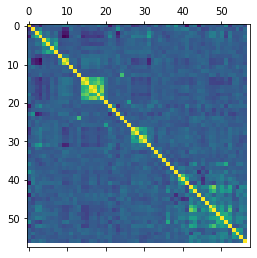

In [27]:
plt.matshow(data.corr())
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  
import pandas as pd 
from pandas.api.types import CategoricalDtype 
from sklearn.impute import SimpleImputer

In [30]:
data = pd.read_csv('./data/final_cohort_v3.csv')
data = data.iloc[:, 4:]
data.drop(columns="allergy_cum", inplace=True)
data.head()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label,neopterin,riboflavin,nicotinicacid,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide,cotinine,hydroxycotinine
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.4,15.40,0.0,1.3700,21.60,151.0,106.0,23.2,0.358,29.6,0.1340,0.351,74.6,21.7,62.8,25.1,0.974,57.0,11.20,7.95,1.67,1.300,0.0,0.0
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,21.1,12.10,0.0,0.1770,17.90,146.0,91.0,32.9,0.459,48.8,0.1370,4.230,65.4,17.6,63.2,28.2,1.020,51.8,11.30,9.98,1.84,1.360,0.0,0.0
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,2.970,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,20.9,12.00,0.0,0.3460,49.50,217.0,108.0,38.9,0.531,41.3,0.0953,0.522,82.4,24.3,68.0,18.4,1.020,52.9,13.10,10.40,2.46,0.898,0.0,0.0
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,NaN,NaN,8.0,NaN,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,17.1,7.18,0.0,0.0632,8.58,33.7,NaN,41.1,0.508,47.0,0.1870,7.900,69.7,22.8,62.7,24.6,1.030,51.5,9.15,8.24,1.47,8.820,0.0,0.0


In [31]:
pd.set_option('display.max_columns', None)
data.loc[data['bf_m6'] == 99, 'bf_m6'] = np.nan
data.loc[data['bisq_q3_m12'] == -8888, 'bisq_q3_m12'] = np.nan
data.loc[data['bisq_totslphrs_m12'] == -8888, 'bisq_totslphrs_m12'] = np.nan
data.drop(columns=["eczema_label", 'rhinitis_label', 'wheeze_label'], inplace=True)
data.drop(columns=['nicotinicacid', 'cotinine', 'hydroxycotinine'], inplace=True)



In [32]:
cat_imp_ls = ['ethnicity', 'household_income', 'pc_vig', 'pc_mvpa', 'pg_vig', 'pg_mvpa']
imp = SimpleImputer(strategy="most_frequent")
data[cat_imp_ls] = imp.fit_transform(data[cat_imp_ls])
data = data.fillna(data.median())
data.head()

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,15.4,15.40,1.3700,21.60,151.0,106.0,23.2,0.3580,29.60,0.1340,0.351,74.6,21.7,62.8,25.10,0.974,57.0,11.20,7.950,1.67,1.300
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,21.1,12.10,0.1770,17.90,146.0,91.0,32.9,0.4590,48.80,0.1370,4.230,65.4,17.6,63.2,28.20,1.020,51.8,11.30,9.980,1.84,1.360
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,33.0,36.0,3.0,6.0,0.0,0.0,0.0,0.0,2.970,0.0,0.0,9.0,12.0,9.0,12.0,0.0,0.0,0.0,0.0,0.0,17.2,14.60,0.1410,19.60,77.7,82.0,31.6,0.3935,43.25,0.1410,1.610,67.3,18.7,70.0,16.95,1.015,46.9,12.95,8.975,1.84,1.385
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,20.9,12.00,0.3460,49.50,217.0,108.0,38.9,0.5310,41.30,0.0953,0.522,82.4,24.3,68.0,18.40,1.020,52.9,13.10,10.400,2.46,0.898
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,33.0,36.0,8.0,6.0,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,17.1,7.18,0.0632,8.58,33.7,82.0,41.1,0.5080,47.00,0.1870,7.900,69.7,22.8,62.7,24.60,1.030,51.5,9.15,8.240,1.47,8.820


In [33]:
data['ethnicity'] = pd.Categorical(data.ethnicity)
inc_type = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)
vig_type = CategoricalDtype(categories=[0, 1, 2], ordered=True)
mvpa_type = CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0], ordered=True)
# df['highest_edu'] = df['highest_edu'].astype(edu_type)
data['household_income'] = data['household_income'].astype(inc_type)
data[['pc_vig', 'pg_vig']] = data[['pc_vig', 'pg_vig']].astype(vig_type)
data[['pc_mvpa', 'pg_mvpa']] = data[['pc_mvpa', 'pg_mvpa']].astype(mvpa_type)
data.describe()

,delivery_age,highest_edu12,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.00000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,31.591086,0.778454,0.017376,0.358818,0.316247,1.299739,0.511729,38.796299,34.177237,36.516942,34.051260,36.43788,7.253692,6.357081,0.165074,0.421373,0.026933,0.773241,3.109119,0.332754,0.073849,8.694345,11.965740,9.046192,11.935259,0.539531,0.423979,0.030408,0.052997,0.111208,17.849435,19.926368,0.195932,24.215682,88.961694,81.817550,32.269823,0.397682,43.574269,0.151777,2.196120,67.847813,18.515337,71.815812,17.812511,1.025530,46.959427,13.040420,9.111394,1.923508,2.292219
std,4.736035,0.415468,0.130725,0.479862,0.465213,0.458343,0.500080,1.474995,9.426136,8.553739,8.853394,8.28090,4.334084,4.100927,0.371409,0.493994,0.161958,0.907848,0.449450,0.471404,0.261638,1.570952,2.194315,1.082938,1.367602,0.498652,0.494402,0.171783,0.224126,0.314526,3.911707,24.742382,0.213486,24.229052,56.145117,21.604945,7.231955,0.048952,9.623093,0.056152,2.174177,8.272562,3.789751,15.705734,5.326674,0.173466,6.447685,2.101800,1.358657,0.539435,3.881666
min,18.930000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.860000,20.000000,20.000000,20.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.060000,1.940000,0.020200,2.750000,8.560000,20.000000,13.600000,0.275000,13.100000,0.044000,0.078700,42.700000,9.530000,35.500000,5.220000,0.510000,19.700000,6.440000,6.020000,0.870000,0.286000
25%,28.305000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.140000,27.000000,31.000000,29.000000,32.00000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.856500,0.000000,0.000000,8.000000,11.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,11.400000,0.114000,13.800000,53.100000,74.000000,29.050000,0.376000,39.200000,0.125000,1.045000,64.050000,16.000000,64.800000,15.000000,0.946500,44.300000,12.076667,8.475000,1.680000,1.140000
50%,31.520000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,39.000000,33.000000,36.000000,33.000000,36.00000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.120000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.200000,14.600000,0.141000,19.600000,77.700000,82.000000,31.600000,0.393500,43.250000,0.141000,1.610000,67.300000,18.700000,70.000000,16.950000,1.015000,46.900000,12.950000,8.975000,1.840000,1.385000
75%,34.880000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,39.710000,40.000000,42.000000,38.000000,40.00000,10.000000,8.000000,0.000000,1.000000,0.000000,1.000000,3.390000,1.000000,0.000000,9.000000,13.000000,9.500000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.700000,18.800000,0.189500,27.200000,109.000000,88.000000,34.750000,0.413500,47

In [34]:
data.head(2)

,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,neopterin,riboflavin,trigonelline,pyridoxal,pyridoxalphosphate,vitamind3,arginine,adma,creatine,cystathionine,m3histidine,histidine,methionine,hydroxyanthralinicac,kynurenicacid,kynurenine,tryptophan,betaine,choline,dimethylglycine,trimethylaminenoxide
0,1.0,35.94,1.0,3,2,3.0,0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,15.4,15.4,1.370,21.6,151.0,106.0,23.2,0.358,29.6,0.134,0.351,74.6,21.7,62.8,25.1,0.974,57.0,11.2,7.95,1.67,1.30
1,1.0,32.54,1.0,3,1,1.0,0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,21.1,12.1,0.177,17.9,146.0,91.0,32.9,0.459,48.8,0.137,4.230,65.4,17.6,63.2,28.2,1.020,51.8,11.3,9.98,1.84,1.36


In [35]:
X = add_constant(data)  
# X.drop('stai_trait_m3', axis=1, inplace=True)
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
ds.drop('const', inplace=True)
print(ds) 

ethnicity                1.725081
delivery_age             1.487836
highest_edu12            1.566398
household_income         1.732221
pc_vig                   1.410506
pc_mvpa                  1.546797
pg_vig                   1.202592
pg_mvpa                  1.363622
smoking_pg               1.107793
passive_smoke_pc         2.852664
passive_smoke_pg         2.757151
delivery_mode            1.099249
sex                      1.046523
ga                       1.621842
stai_state_pw26          3.235826
stai_trait_pw26          4.063910
stai_state_m3            4.198260
stai_trait_m3            5.009762
epds_tot_pw26            2.196597
epds_tot_m3              2.843359
infection_m3             1.238656
alcohol_pc               1.318511
alcohol_pg               1.114331
parity                   1.486374
weight_birth             1.644060
antibiotics_labour       1.065121
antibiotics_m3           1.207434
bisq_q3_m6               2.374599
bisq_totslphrs_m6        2.293546
bisq_q3_m12   

### Ploting on VIF values

In [36]:
ds = pd.DataFrame(ds, columns=['VIF'])
ds['label'] = 'VIF < 5'
ds.loc[ds[ds.VIF > 5].index, 'label'] = 'VIF >= 5'
ds.head()

,VIF,label
ethnicity,1.725081,VIF < 5
delivery_age,1.487836,VIF < 5
highest_edu12,1.566398,VIF < 5
household_income,1.732221,VIF < 5
pc_vig,1.410506,VIF < 5


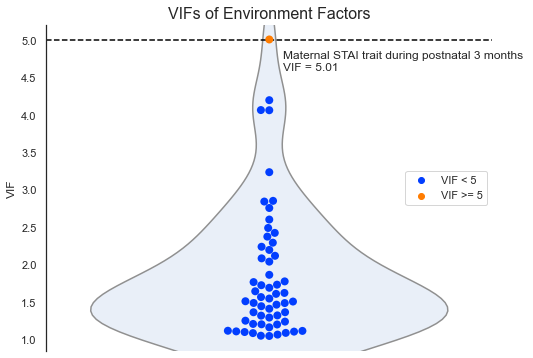

In [37]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.bottom": False}
sns.set_theme(style="white", rc=custom_params)

fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.violinplot(y = "VIF", data = ds, inner=None, color="#E7EFFA")

sns.swarmplot(y="VIF", hue='label', size=8, data=ds, palette='bright')
graph.legend(loc = 'center right')
graph.set_title('VIFs of Environment Factors', fontdict={'size': 16})
graph.text(x=0.03, y=4.6, s="Maternal STAI trait during postnatal 3 months \nVIF = 5.01")
graph.axhline(5, ls="--", color='black')
graph.figure.savefig('./plot/violin_plot.pdf')

In [38]:
graph.savefig('./plot/violin_plot.pdf')

## Not used

In [7]:
fn2 = './tableone/paper/final_cohort.html'
mytable.to_html(fn2)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def print_tableone(df, column):
    columns = list(df.columns)
    columns = [column] + columns[3:]
    categorical = [column]+['ethnicity', 'highest_edu', 'household_income', 'pc_vig', 'pc_mvpa', 'pg_vig', 
    'pg_mvpa', 'smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'delivery_mode', 'sex', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 
    'antibiotics_labour', 'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
    mytable = TableOne(df, columns=columns, categorical=categorical, groupby=column, pval=True)
    print('Table One Grouped By: ' + column)
    print(mytable.tabulate(tablefmt="github"))

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# print_tableone(gusto, 'eczema_cum')
# print_tableone(gusto, 'rhinitis_cum')
# print_tableone(gusto, 'wheeze_cum')

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


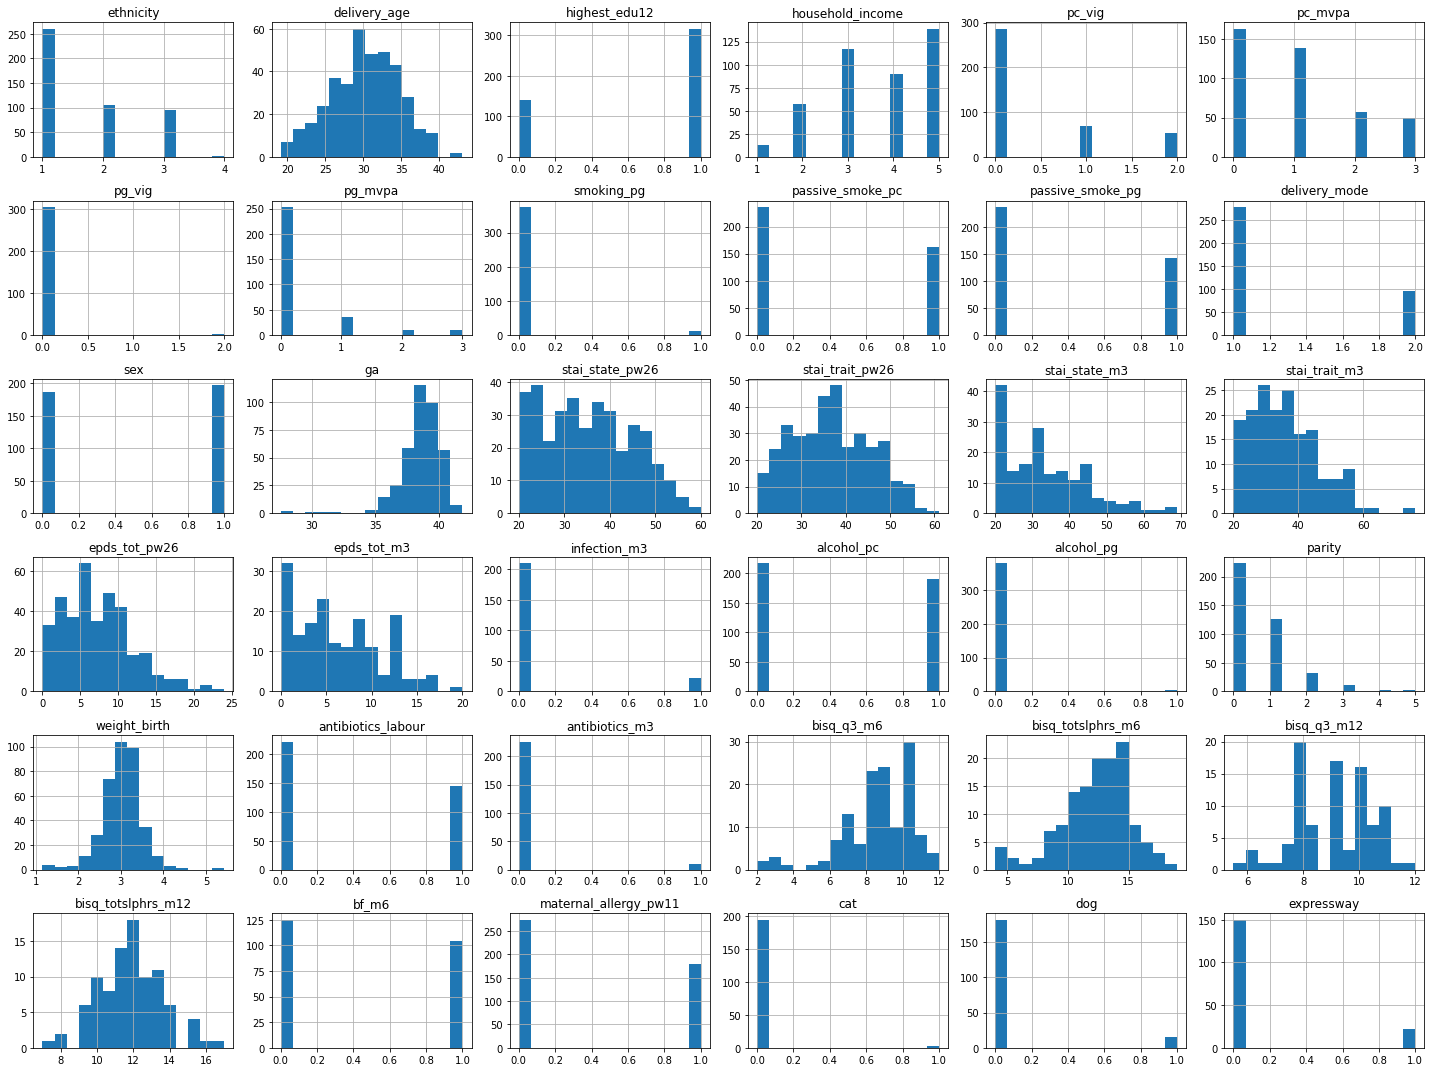

In [14]:
data.hist(bins=15, figsize=(20, 15))
plt.tight_layout()
plt.show()

Correlation plot

In [ ]:
# read csv files and unify columns
gusto = pd.read_csv('data/gusto3.csv')
gusto = gusto.iloc[:, 1:]
gusto.head()
spresto = pd.read_csv('data/spresto3_mapped.csv')
spresto = spresto.iloc[:, 1:]
spresto.columns = gusto.columns

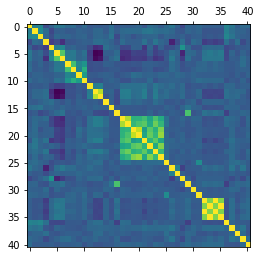

In [ ]:
plt.matshow(gusto.corr())
plt.show()

In [ ]:
corr = gusto.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/jd/blcrh7m92fx922hgw12_hbv00000gn/T/ipykernel_1686/1928362483.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,eczema_cum,rhinitis_cum,wheeze_cum,ethnicity,delivery_age,highest_edu,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,bdi_tot_pw26,bdi_tot_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway
eczema_cum,1.00,0.17,0.22,-0.10,0.01,0.13,0.12,0.05,0.07,-0.02,0.06,-0.04,-0.02,-0.03,-0.01,0.07,-0.04,-0.01,-0.01,0.01,0.03,-0.05,0.07,0.04,-0.02,0.06,0.12,0.01,-0.12,0.03,0.01,0.04,0.00,-0.00,0.00,-0.00,0.21,0.12,-0.00,0.06,0.07
rhinitis_cum,0.17,1.00,0.25,0.07,-0.12,0.00,0.00,-0.03,-0.02,0.02,0.01,-0.02,0.04,0.05,-0.02,0.09,-0.01,0.06,0.07,0.07,0.06,0.13,0.14,0.09,0.07,0.08,0.04,-0.04,-0.05,0.04,0.01,0.03,-0.05,-0.05,-0.05,-0.05,0.19,0.09,0.03,0.02,-0.02
wheeze_cum,0.22,0.25,1.00,0.04,-0.08,0.05,0.02,0.03,-0.01,0.02,0.04,-0.03,0.05,0.05,0.02,0.12,-0.11,0.03,0.00,-0.06,-0.01,0.03,0.03,0.04,-0.03,0.03,0.01,-0.02,0.01,-0.05,-0.01,0.01,-0.05,-0.03,-0.05,-0.03,0.22,0.12,0.03,0.00,-0.02
ethnicity,-0.10,0.07,0.04,1.00,-0.17,-0.10,-0.24,-0.05,-0.05,-0.01,0.01,0.00,0.08,0.09,0.06,0.02,-0.07,0.07,0.01,0.00,0.00,0.11,0.00,0.13,0.04,-0.01,-0.30,-0.09,0.09,-0.07,0.06,0.03,-0.17,-0.14,-0.17,-0.14,0.09,-0.04,0.09,-0.11,-0.01
delivery_age,0.01,-0.12,-0.08,-0.17,1.00,0.18,0.24,0.01,0.03,-0.02,-0.01,-0.10,-0.26,-0.23,0.09,0.03,0.00,-0.13,-0.12,0.01,0.00,-0.20,0.03,-0.14,0.01,-0.09,-0.08,0.00,0.31,0.06,-0.07,-0.07,0.04,0.06,0.04,0.06,-0.12,-0.08,-0.03,-0.03,-0.00
highest_edu,0.13,0.00,0.05,-0.10,0.18,1.00,0.62,0.13,0.14,0.03,0.09,-0.17,-0.43,-0.41,-0.01,-0.00,0.07,-0.23,-0.23,-0.13,-0.16,-0.16,-0.01,-0.15,-0.10,-0.04,0.08,0.04,-0.29,0.06,0.05,-0.03,0.11,0.15,0.11,0.15,-0.13,0.03,-0.06,0.02,-0.04
household_income,0.12,0.00,0.02,-0.24,0.24,0.62,1.00,0.15,0.13,0.03,0.07,-0.15,-0.40,-0.36,-0.06,0.04,0.10,-0.27,-0.24,-0.18,-0.17,-0.20,-0.09,-0.21,-0.17,-0.03,0.14,0.01,-0.17,0.10,-0.02,-0.04,0.13,0.14,0.13,0.14,-0.12,-0.00,-0.02,0.08,0.00
pc_vig,0.05,-0.03,0.03,-0.05,0.01,0.13,0.15,1.00,0.57,0.22,0.31,-0.08,-0.07,-0.08,0.00,-0.00,-0.05,-0.06,-0.06,-0.05,-0.06,-0.00,0.00,-0.02,-0.04,-0.06,0.07,0.01,-0.08,-0.02,-0.03,0.04,0.05,0.01,0.05,0.01,-0.03,-0.03,0.01,0.08,-0.01
pc_mvpa,0.07,-0.02,-0.01,-0.05,0.03,0.14,0.13,0.57,1.00,0.19,0.47,-0.09,-0.07,-0.08,-0.06,-0.03,-0.03,-0.08,-0.09,-0.10,-0.08,-0.02,-0.01,-0.09,-0.08,-0.03,0.07,0.02,-0.07,-0.04,0.01,0.05,0.04,0.02,0.04,0.02,-0.03,-0.03,0.00,0.02,0.01
pg_vig,-0.02,0.02,0.02,-0.01,-0.02,0.03,0.03,0.22,0.19,1.00,0.35,-0.02,-0.03,-0.00,0.01,-0.00,-0.06,-0.02,-0.00,0.08,0.06,0.02,0.03,0.00,0.04,0.04,0.01,0.06,0.03,-0.01,0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.05,0.01,-0.04,0.02


In [ ]:
corr = spresto.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/jd/blcrh7m92fx922hgw12_hbv00000gn/T/ipykernel_1686/867034251.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,eczema_cum,rhinitis_cum,wheeze_cum,ethnicity,delivery_age,highest_edu,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,bdi_tot_pw26,bdi_tot_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway
eczema_cum,1.00,0.16,0.19,-0.16,-0.03,0.05,0.02,-0.01,-0.19,-0.16,-0.13,nan,-0.16,-0.11,0.05,-0.02,-0.07,-0.00,-0.05,0.05,0.08,-0.07,-0.08,-0.09,0.11,0.03,0.13,-0.13,-0.14,-0.10,0.04,0.08,0.03,0.01,0.03,0.01,0.03,-0.03,-0.01,-0.17,-0.02
rhinitis_cum,0.16,1.00,0.29,0.02,-0.03,0.02,-0.09,-0.04,-0.13,-0.23,-0.10,0.03,0.02,0.07,0.07,0.03,0.04,0.06,0.07,0.07,0.04,0.04,0.09,0.03,0.03,-0.00,0.09,0.02,0.01,-0.07,0.10,-0.04,-0.13,-0.09,-0.13,-0.09,-0.08,0.02,0.06,-0.06,-0.10
wheeze_cum,0.19,0.29,1.00,0.02,-0.15,0.02,-0.14,0.03,0.09,0.03,0.09,0.12,-0.02,0.04,0.07,-0.03,0.01,0.09,0.02,0.01,0.07,0.09,-0.03,0.11,-0.07,0.17,-0.06,-0.02,-0.02,-0.05,0.09,0.07,-0.21,-0.16,-0.21,-0.16,0.07,0.01,-0.05,-0.14,0.03
ethnicity,-0.16,0.02,0.02,1.00,-0.22,-0.27,-0.20,0.02,0.14,0.22,0.35,0.07,0.09,0.17,-0.00,-0.01,-0.03,0.02,-0.01,0.11,0.05,0.06,0.09,0.09,0.07,0.15,-0.35,-0.08,0.17,-0.02,-0.02,0.06,-0.25,-0.24,-0.25,-0.24,-0.11,-0.03,0.16,-0.06,-0.01
delivery_age,-0.03,-0.03,-0.15,-0.22,1.00,0.29,0.23,-0.03,-0.08,-0.11,-0.10,-0.12,-0.15,-0.20,0.11,-0.02,-0.09,0.06,0.05,-0.06,-0.07,0.01,-0.14,-0.01,-0.10,-0.02,-0.04,0.10,0.23,-0.04,0.04,-0.00,0.04,0.06,0.04,0.06,0.05,-0.02,-0.10,-0.07,0.03
highest_edu,0.05,0.02,0.02,-0.27,0.29,1.00,0.49,0.00,-0.13,0.14,-0.08,-0.23,-0.20,-0.33,-0.11,-0.04,-0.03,-0.15,-0.18,-0.16,-0.16,-0.14,-0.21,-0.22,-0.12,-0.05,0.10,0.00,-0.20,-0.08,-0.14,0.02,0.11,0.19,0.11,0.19,0.29,0.06,-0.11,-0.03,-0.01
household_income,0.02,-0.09,-0.14,-0.20,0.23,0.49,1.00,-0.07,-0.15,0.07,-0.21,-0.31,-0.21,-0.38,-0.04,0.02,0.02,-0.03,0.02,-0.09,-0.10,-0.03,-0.13,-0.09,-0.07,-0.14,0.17,0.08,-0.16,-0.04,-0.10,-0.11,0.30,0.30,0.30,0.30,0.24,0.07,-0.03,-0.01,-0.08
pc_vig,-0.01,-0.04,0.03,0.02,-0.03,0.00,-0.07,1.00,0.32,-0.04,-0.01,0.06,0.06,0.11,-0.07,-0.01,0.05,-0.04,-0.10,-0.00,0.01,-0.07,-0.06,-0.01,-0.03,0.00,-0.02,-0.04,-0.14,0.01,0.02,0.01,0.14,0.08,0.14,0.08,-0.04,-0.04,-0.06,-0.01,0.03
pc_mvpa,-0.19,-0.13,0.09,0.14,-0.08,-0.13,-0.15,0.32,1.00,0.12,0.34,-0.02,0.07,0.12,-0.04,0.03,-0.01,-0.04,-0.08,-0.17,-0.17,-0.04,-0.20,-0.07,-0.17,0.01,-0.13,-0.01,0.02,0.01,-0.06,-0.05,0.02,-0.03,0.02,-0.03,-0.08,-0.09,-0.03,-0.05,0.09
pg_vig,-0.16,-0.23,0.03,0.22,-0.11,0.14,0.07,-0.04,0.12,1.00,0.26,nan,0.04,0.05,-0.13,0.03,0.05,0.07,0.13,-0.10,-0.14,-0.12,-0.13,0.10,-0.26,-0.02,-0.08,-0.03,-0.07,0.04,0.09,0.04,-0.19,-0.07,-0.19,-0.07,0.11,0.15,-0.04,-0.03,-0.08
